<a href="https://colab.research.google.com/github/elenachau/machine-learning/blob/main/gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objectives**

* understand logistic regression
* implement logistic regression and understand how to model a classification model

## **Dataset**

The dataset choosen for this experiment is Gender classification dataset. The dataset contains 66 samples and 5 columns.

### **Attribute Information**

- `Favorite Color`: This attribute represents the individual's favorite color. It's encoded with numerical values, which likely correspond to different color categories or codes. The values in this column range from 0 to 5, indicating various color preferences.
- `Favorite Music Genre`: This attribute represents the individual's favorite music genre. Similar to "Favorite Color," it is encoded with numerical values, possibly corresponding to different music genres. The values in this column range from 0 to 5, indicating various music genre preferences.
- `Favorite Beverage`: This attribute represents the individual's favorite beverage. It's encoded with numerical values, likely corresponding to different beverage types or codes. The values in this column range from 0 to 3, indicating various beverage preferences.
- `Favorite Soft Drink`: This attribute represents the individual's favorite soft drink. Like the previous attributes, it is encoded with numerical values, possibly corresponding to different soft drink brands or types. The values in this column range from 0 to 2, indicating various soft drink preferences.
- `Gender`: This attribute represents the gender of the individuals. It is a binary attribute with values of 0 and 1, where 0 typically represents one gender (e.g., male) and 1 represents the other gender (e.g., female).

In [ ]:
#load necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#load dataset

df = pd.read_csv('Gender.csv')
df

,Favorite Color,Favorite music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,2,0,0,0,0
1,0,1,0,1,0
2,1,0,1,1,0
3,1,2,2,2,0
4,2,0,0,1,0
...,...,...,...,...,...
61,2,0,0,1,1
62,2,1,3,1,1
63,0,1,-1,2,1
64,2,0,1,1,1


**Exercise 3**

Prepare dataset for model building (Data Preprocessing, Data Visualization)

In [ ]:
df.describe()

,Favorite Color,Favorite music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.454545,2.606061,1.469697,1.333333,0.500000
std,0.683471,2.147476,1.799314,1.127739,0.503831
min,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,3.000000,1.500000,1.000000,0.500000
75%,2.000000,4.000000,3.000000,2.000000,1.000000
max,2.000000,6.000000,4.000000,4.000000,1.000000


In [ ]:
df.head()

,Favorite Color,Favorite music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,2,0,0,0,0
1,0,1,0,1,0
2,1,0,1,1,0
3,1,2,2,2,0
4,2,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        66 non-null     int64
 1   Favorite music Genre  66 non-null     int64
 2   Favorite Beverage     66 non-null     int64
 3   Favorite Soft Drink   66 non-null     int64
 4   Gender                66 non-null     int64
dtypes: int64(5)
memory usage: 2.7 KB


In [ ]:
df['Gender'].value_counts()

0    31
1    31
Name: Gender, dtype: int64

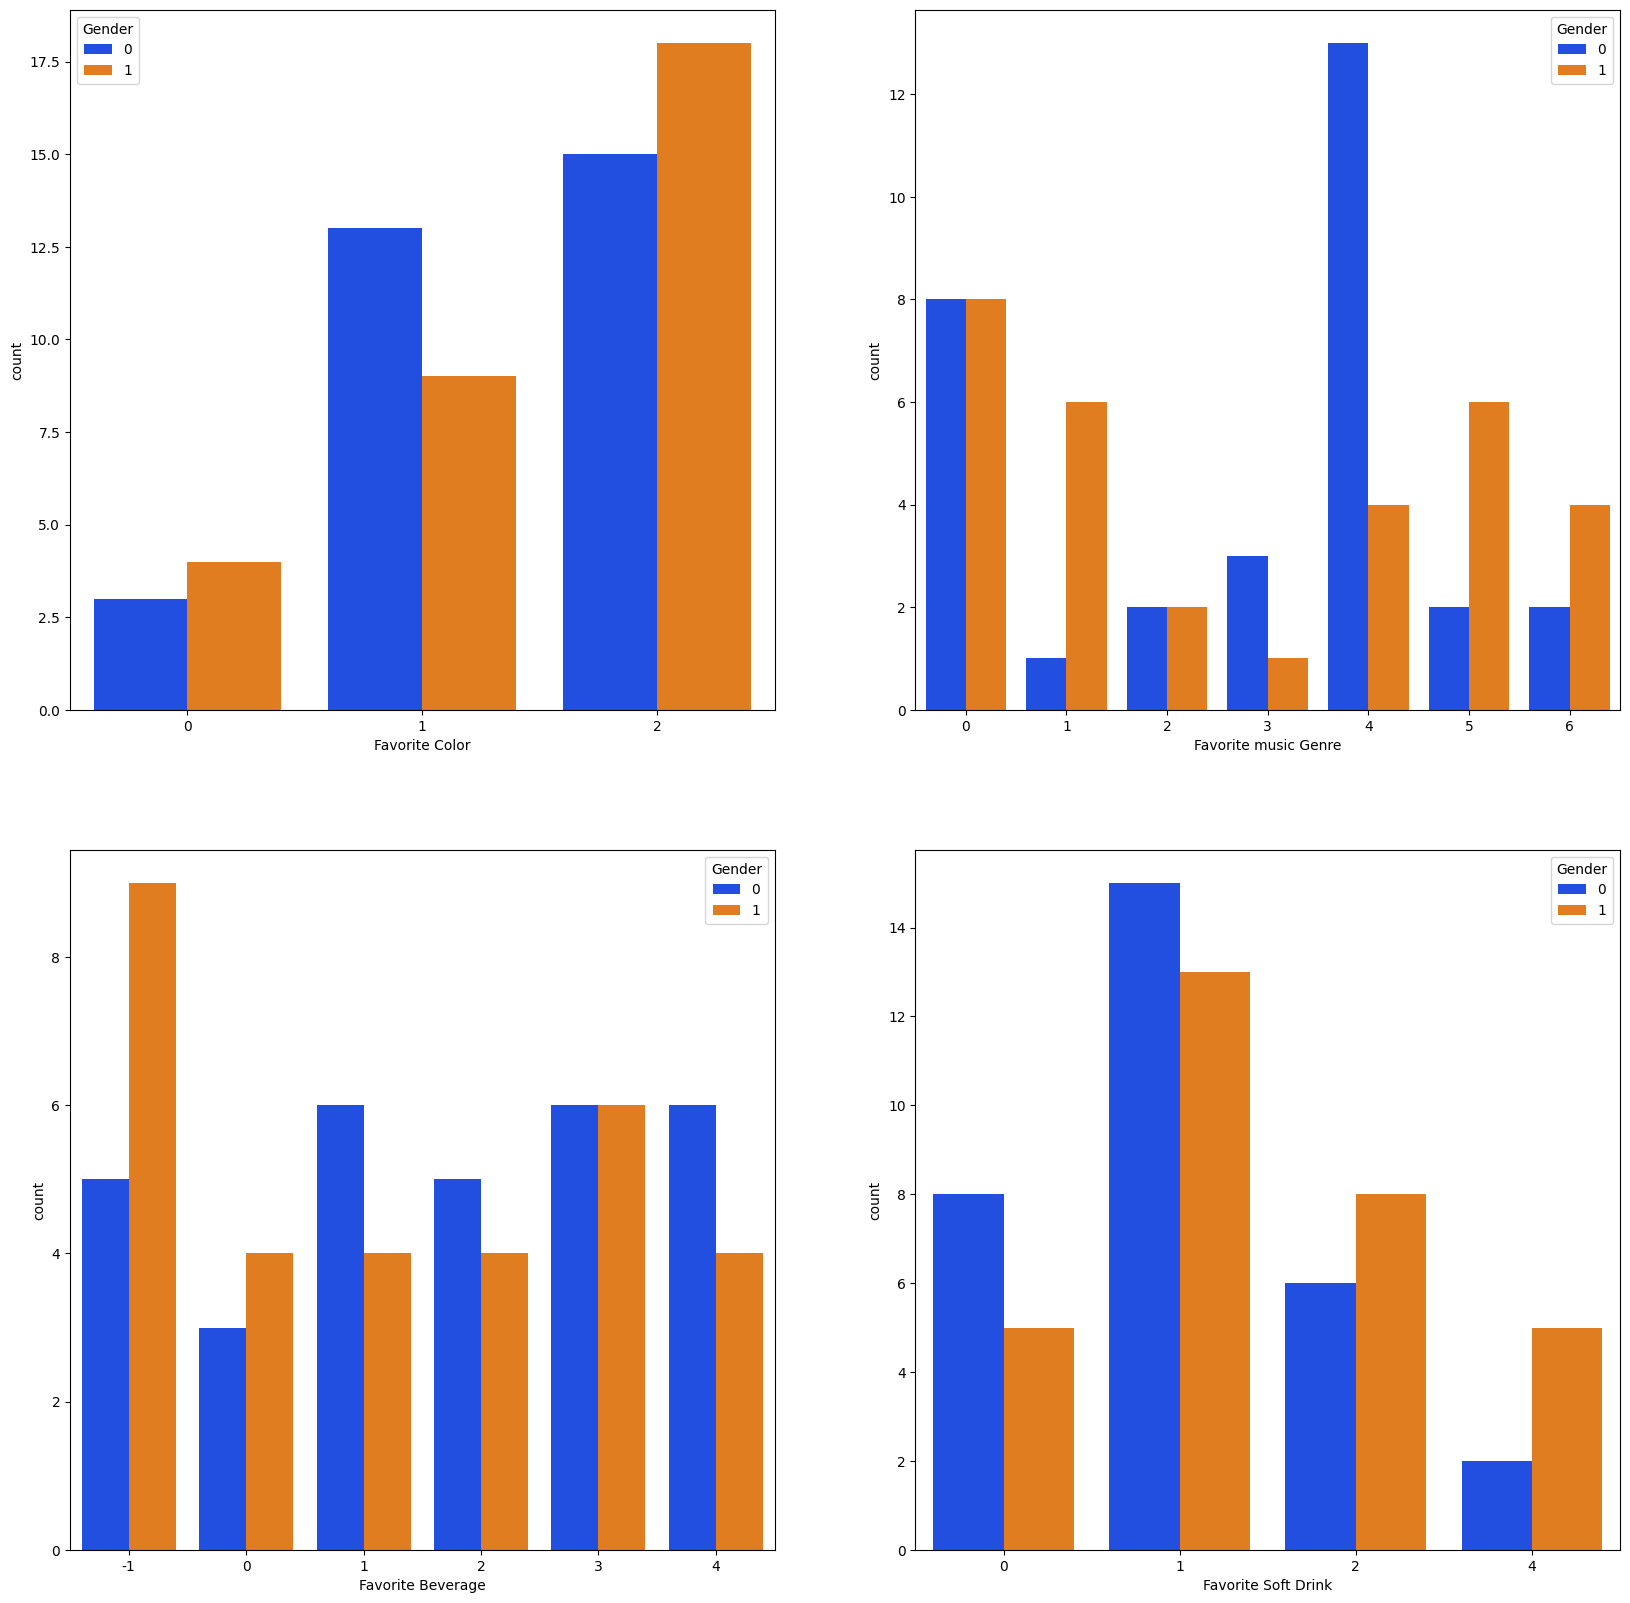

In [ ]:
from typing import List

def plot_count_chart(df:pd.DataFrame, target:str, features:List[str]) -> None:
  plt.figure(figsize=(20,20))
  for loc, feature in enumerate(features, 1):
    plt.subplot(2,2,loc)
    sns.countplot(data=df, x=feature, hue=target, palette='bright')
  plt.show()

plot_count_chart(df, 'Gender', df.columns.tolist()[:-1])

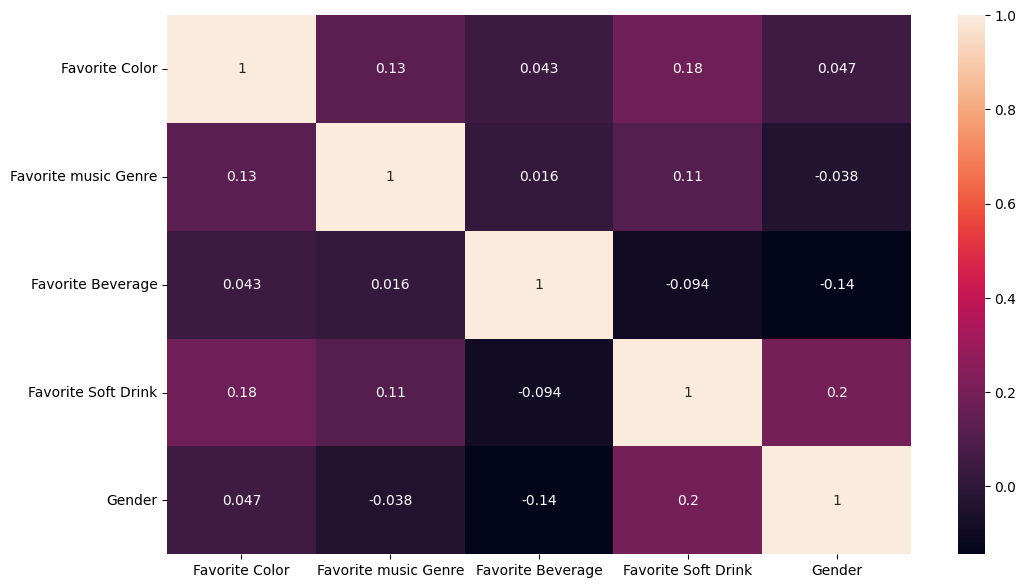

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#split data into train and test sets

target = df['Gender']
features = df.drop(['Gender'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
x_train.shape

(49, 4)

In [ ]:
#apply logistic regression on the dataset and report there accuracies

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

In [ ]:
results = pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_test_predict)], axis=1)
results.columns = ['Actual', 'Predicted']
results

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
5,1,1
6,0,0
7,0,0
8,0,1
9,1,1


In [ ]:
print(f"Train accuracy: {round(accuracy_score(y_train, y_train_predict), 3)}")
print(f"Test accuracy: {round(accuracy_score(y_test, y_test_predict), 3)}")

Train accuracy: 0.51
Test accuracy: 0.692
